# Next-Word-Prediction

# Step 1: Import libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os
!pip install pydot
import matplotlib.pyplot as plt

# Step 2: Load your file

In [2]:
path = "C:\\Users\\Snigdha\\OneDrive\\Desktop\\New folder\\pg145.txt"

# Step 3: Open and pre-process the data

In [3]:
file = open("C:\\Users\\Snigdha\\OneDrive\\Desktop\\New folder\\pg145.txt", "r", encoding = "utf8")

# store file in list
lines = []
for i in file:
    lines.append(i)

# Convert list to string
data = ""
for i in lines:
  data = ' '. join(lines) 

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces 
data = data.split()
data = ' '.join(data)
data[:500]

'The Project Gutenberg eBook of Middlemarch, by George Eliot This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before using this eBoo'

In [5]:
len(data)

1783493

# Step 4: Apply tokenization and some other changes

In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[1, 366, 358, 1985, 3, 158, 32, 2247, 5558, 35, 1985, 24, 20, 1, 258]

In [7]:
len(sequence_data)

321821

In [8]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

17871


In [9]:
sequences = []

for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]


The Length of sequences are:  321818


array([[   1,  366,  358, 1985],
       [ 366,  358, 1985,    3],
       [ 358, 1985,    3,  158],
       [1985,    3,  158,   32],
       [   3,  158,   32, 2247],
       [ 158,   32, 2247, 5558],
       [  32, 2247, 5558,   35],
       [2247, 5558,   35, 1985],
       [5558,   35, 1985,   24],
       [  35, 1985,   24,   20]])

In [10]:
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])
    
X = np.array(X)
y = np.array(y)

In [11]:
print("Data: ", X[:10])
print("Response: ", y[:10])

Data:  [[   1  366  358]
 [ 366  358 1985]
 [ 358 1985    3]
 [1985    3  158]
 [   3  158   32]
 [ 158   32 2247]
 [  32 2247 5558]
 [2247 5558   35]
 [5558   35 1985]
 [  35 1985   24]]
Response:  [1985    3  158   32 2247 5558   35 1985   24   20]


In [12]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Step 5: Creating the model

In [13]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             178710    
                                                                 
 lstm (LSTM)                 (None, 3, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 17871)             17888871  
                                                                 
Total params: 31,116,581
Trainable params: 31,116,581
Non-trainable params: 0
_________________________________________________________________


# Step 6: Plot the model

In [16]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


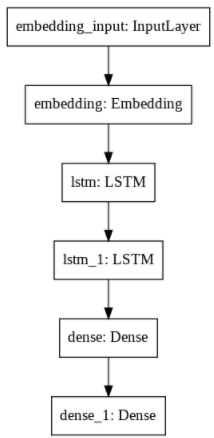

# Step 7: Train the model

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import Model

checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)

In [18]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))


In [19]:
history = model.fit(X, y, epochs=3, batch_size=64, callbacks=[checkpoint])

Epoch 1/3
5029/5029 [==============================] - ETA: 0s - loss: 6.3798
Epoch 1: loss improved from inf to 6.37982, saving model to next_words.h5
5029/5029 [==============================] - 666s 131ms/step - loss: 6.3798
Epoch 2/3
5029/5029 [==============================] - ETA: 0s - loss: 5.7952
Epoch 2: loss improved from 6.37982 to 5.79525, saving model to next_words.h5
5029/5029 [==============================] - 704s 140ms/step - loss: 5.7952
Epoch 3/3
5029/5029 [==============================] - ETA: 0s - loss: 5.5164
Epoch 3: loss improved from 5.79525 to 5.51639, saving model to next_words.h5
5029/5029 [==============================] - 680s 135ms/step - loss: 5.5164


In [21]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer
pickle.dump(tokenizer, open('token.pkl', 'wb'))
model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))


def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""
  
  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break
  
  print(predicted_word)
  return predicted_word

In [22]:
while(True):
  text = input("Enter your line: ".lower())
  
  if text == "0":
      print("Execution completed.....")
      break
  
  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)
        
          Predict_Next_Words(model, tokenizer, text)
          
      except Exception as e:
        print("Error occurred: ",e)
        continue


enter your line: If you are not located in the United States, you will have to check the laws of the
['laws', 'of', 'the']
1/1 [==============================] - 2s 2s/step
world
enter your line: and deed in noble agreement; but after all, to common eyes their struggles 
['their', 'struggles', '']
1/1 [==============================] - 1s 1s/step
of
enter your line: Meanwhile the indefiniteness remains, and the limits of variation are really much wider than 
['wider', 'than', '']
1/1 [==============================] - 0s 31ms/step
the
enter your line: The Project Gutenberg eBook of 
['eBook', 'of', '']
1/1 [==============================] - 0s 32ms/step
the
enter your line: This eBook is for the use of anyone anywhere
['of', 'anyone', 'anywhere']
1/1 [==============================] - 0s 47ms/step
and
enter your line: 0
Execution completed.....
